**Prompt**: Make a markdown header for loading the data and a title for the notebook

**AI**: ChatGPT-4

# AI Assignment Notebook

## Loading the Data

**Prompt**: I have a file called card_transdata.csv. Write python code to load the file using pandas and display the first few rows. Also display some general information about the data like the shape, info, and describe 
(This was the first prompt and the second was the header and title prompt above)

**AI**: ChatGPT-4

In [1]:
import pandas as pd

# Load the CSV file
file_path = "card_transdata.csv"  # Replace with the actual file path if it's in a different location
data = pd.read_csv(file_path)

# Display the first few rows
print("First few rows of the dataset:")
print(data.head())

# Display general information about the data
print("\nShape of the dataset:")
print(data.shape)

print("\nInfo about the dataset:")
print(data.info())

print("\nDescriptive statistics of the dataset:")
print(data.describe())


First few rows of the dataset:
   distance_from_home  distance_from_last_transaction  \
0           57.877857                        0.311140   
1           10.829943                        0.175592   
2            5.091079                             NaN   
3            2.247564                        5.600044   
4           44.190936                        0.566486   

   ratio_to_median_purchase_price  repeat_retailer  used_chip  \
0                        1.945940              1.0        1.0   
1                        1.294219              1.0        NaN   
2                        0.427715              1.0        0.0   
3                        0.362663              1.0        1.0   
4                        2.222767              1.0        1.0   

   used_pin_number  online_order  fraud  
0              0.0           0.0      0  
1              0.0           0.0      0  
2              0.0           1.0      0  
3              0.0           1.0      0  
4              0.0       

**Prompt**: Create a header for Data Wrangling and write code to display a table of any missing values. If there are missing values, drop those rows and display the first few rows of the new dataframe

**AI**: ChatGPT-4

## Data Wrangling



In [2]:
# Data Wrangling

# Check for missing values
print("\nTable of Missing Values:")
missing_values = data.isnull().sum()
print(missing_values)

# If there are missing values, drop those rows
if missing_values.any():
    print("\nDropping rows with missing values...")
    data = data.dropna()
    print("Rows with missing values dropped.")

# Display the first few rows of the cleaned dataframe
print("\nFirst few rows of the cleaned dataset:")
print(data.head())



Table of Missing Values:
distance_from_home                0
distance_from_last_transaction    3
ratio_to_median_purchase_price    2
repeat_retailer                   7
used_chip                         4
used_pin_number                   2
online_order                      4
fraud                             0
dtype: int64

Dropping rows with missing values...
Rows with missing values dropped.

First few rows of the cleaned dataset:
   distance_from_home  distance_from_last_transaction  \
0           57.877857                        0.311140   
3            2.247564                        5.600044   
4           44.190936                        0.566486   
5            5.586408                       13.261073   
6            3.724019                        0.956838   

   ratio_to_median_purchase_price  repeat_retailer  used_chip  \
0                        1.945940              1.0        1.0   
3                        0.362663              1.0        1.0   
4                      

**Prompt**: Make a header to visualize the data. Use seaborn to create a countplot showing the distribution of fraud and not fraud 

**AI**: ChatGPT-4

## Visualize the Data



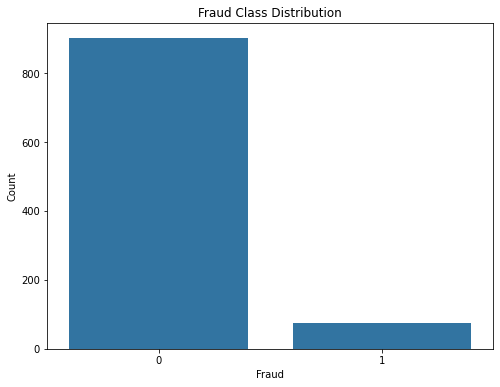

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming the fraud label column is named 'fraud'
# Replace 'fraud' with the actual column name representing fraud/not fraud
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='fraud')
plt.title("Fraud Class Distribution")
plt.xlabel("Fraud")
plt.ylabel("Count")
plt.show()


**Prompt**: Create the same type of plot for used_pin_number, repeat_retailer, and used_chip distributions

**AI**: ChatGPT-4

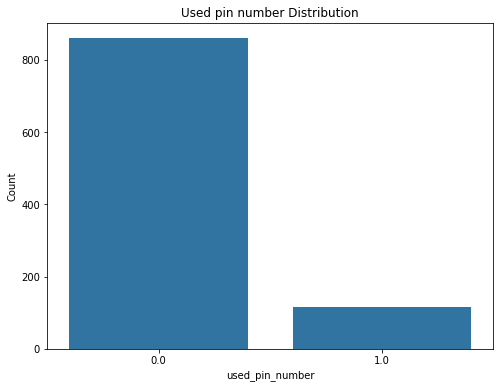

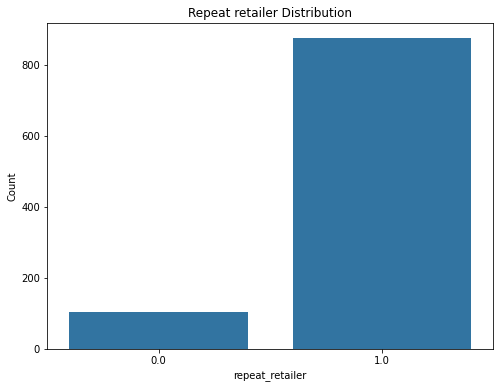

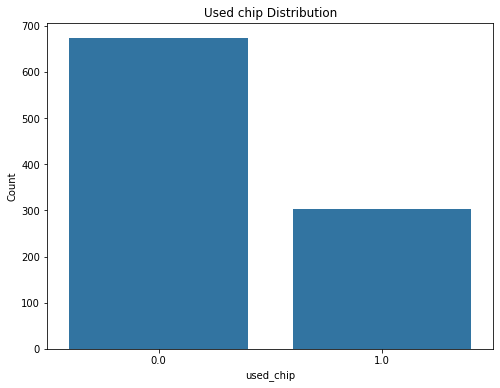

In [4]:
# List of columns to visualize
columns_to_plot = ['used_pin_number', 'repeat_retailer', 'used_chip']

# Create a countplot for each column
for col in columns_to_plot:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=data, x=col)
    plt.title(f"{col.replace('_', ' ').capitalize()} Distribution")
    plt.xlabel(f"{col}")
    plt.ylabel("Count")
    plt.show()


**Prompt**: Now, I want to make a bar graph showing online order distributions

**AI**: ChatGPT-4

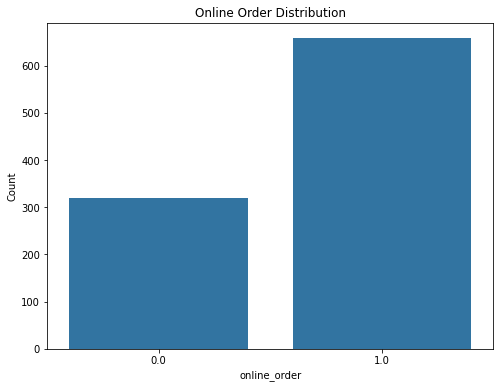

In [5]:
# Assuming the online order column is named 'online_order'
# Replace 'online_order' with the actual column name in your dataset

plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='online_order')
plt.title("Online Order Distribution")
plt.xlabel("online_order")
plt.ylabel("Count")
plt.show()


**Prompt**: Create a histogram to show the distrubution of distance_from_last_transaction, ratio_to_median_purchase_price, and distance_from_home

**AI**: ChatGPT-4

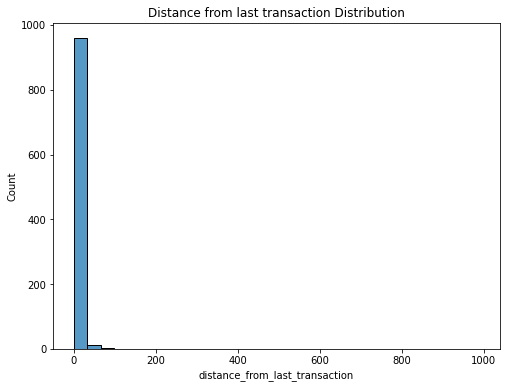

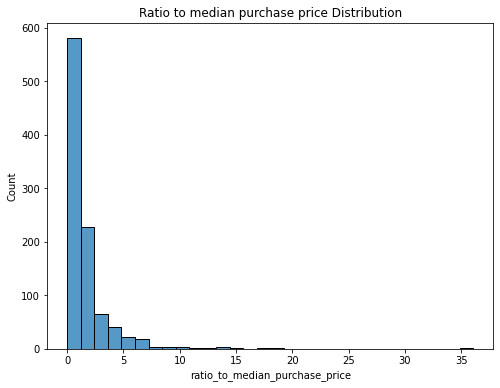

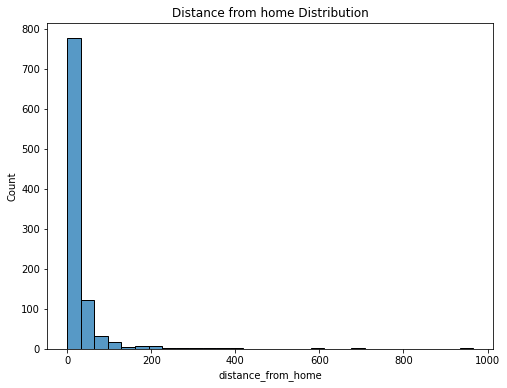

In [6]:
# List of columns to visualize
numerical_columns = ['distance_from_last_transaction', 'ratio_to_median_purchase_price', 'distance_from_home']

# Create a histogram for each column
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=data, x=col, bins=30, edgecolor='black')
    plt.title(f"{col.replace('_', ' ').capitalize()} Distribution")
    plt.xlabel(f"{col}")
    plt.ylabel("Count")
    plt.show()


**Prompt**: Create a subtitle for Better Visualizations. Create a countplot for used_pin_number and color by fraud. Use red for Fraudulent and green for Non-Fraudulent. 

**AI**: ChatGPT-4

## Better Visualizations


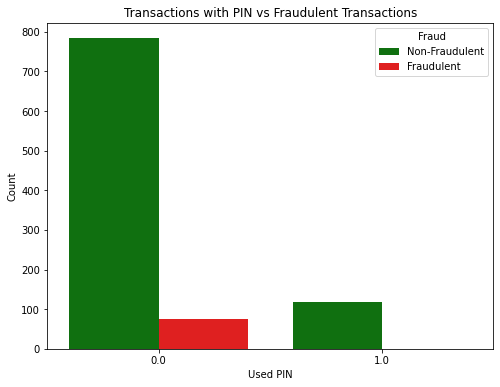

In [7]:
plt.figure(figsize=(8, 6))
sns.countplot(
    data=data, 
    x='used_pin_number', 
    hue='fraud', 
    palette={0: 'green', 1: 'red'}
)
plt.title("Transactions with PIN vs Fraudulent Transactions")
plt.xlabel("Used PIN")
plt.ylabel("Count")
plt.legend(title="Fraud", labels=["Non-Fraudulent", "Fraudulent"])
plt.show()


**Prompt**: Create a percentage stacked bar chart with the same information

**AI**: ChatGPT-4

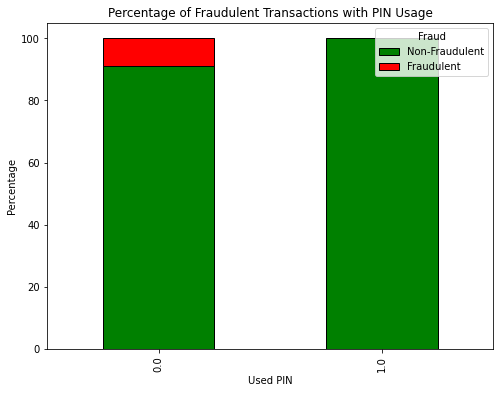

In [8]:
# Calculate the counts for each combination of 'used_pin_number' and 'fraud'
stacked_data = data.groupby(['used_pin_number', 'fraud']).size().unstack(fill_value=0)

# Normalize the counts to get percentages
stacked_data_percentage = stacked_data.div(stacked_data.sum(axis=1), axis=0) * 100

# Plot the percentage stacked bar chart
stacked_data_percentage.plot(
    kind='bar', 
    stacked=True, 
    figsize=(8, 6), 
    color=['green', 'red'], 
    edgecolor='black'
)

# Add titles and labels
plt.title("Percentage of Fraudulent Transactions with PIN Usage")
plt.xlabel("Used PIN")
plt.ylabel("Percentage")
plt.legend(title="Fraud", labels=["Non-Fraudulent", "Fraudulent"])
plt.show()


**Prompt**: Create a countplot for repeat retailers and a percentage stacked bar chart for it. Use green for Not-Fraudulent and red for Fraudulent

**AI**: ChatGPT-4

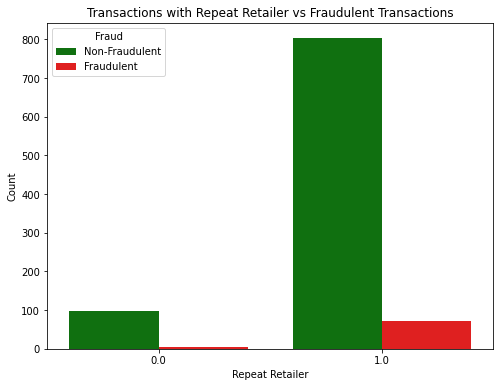

In [9]:
plt.figure(figsize=(8, 6))
sns.countplot(
    data=data, 
    x='repeat_retailer', 
    hue='fraud', 
    palette={0: 'green', 1: 'red'}
)
plt.title("Transactions with Repeat Retailer vs Fraudulent Transactions")
plt.xlabel("Repeat Retailer")
plt.ylabel("Count")
plt.legend(title="Fraud", labels=["Non-Fraudulent", "Fraudulent"])
plt.show()


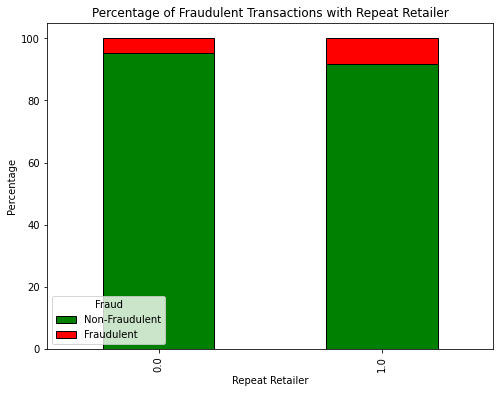

In [10]:
# Calculate the counts for each combination of 'repeat_retailer' and 'fraud'
stacked_data_repeat_retailer = data.groupby(['repeat_retailer', 'fraud']).size().unstack(fill_value=0)

# Normalize the counts to get percentages
stacked_data_repeat_retailer_percentage = stacked_data_repeat_retailer.div(stacked_data_repeat_retailer.sum(axis=1), axis=0) * 100

# Plot the percentage stacked bar chart
stacked_data_repeat_retailer_percentage.plot(
    kind='bar', 
    stacked=True, 
    figsize=(8, 6), 
    color=['green', 'red'], 
    edgecolor='black'
)

# Add titles and labels
plt.title("Percentage of Fraudulent Transactions with Repeat Retailer")
plt.xlabel("Repeat Retailer")
plt.ylabel("Percentage")
plt.legend(title="Fraud", labels=["Non-Fraudulent", "Fraudulent"])
plt.show()


**Prompt**: Do the same plots for used chip

**AI**: ChatGPT-4

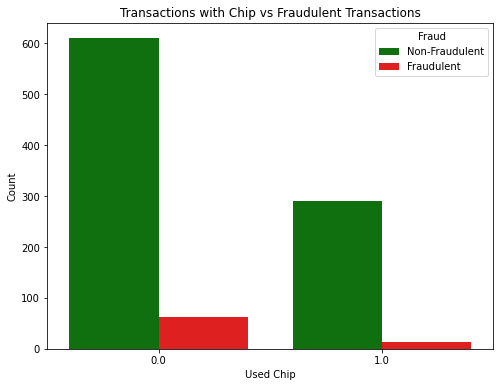

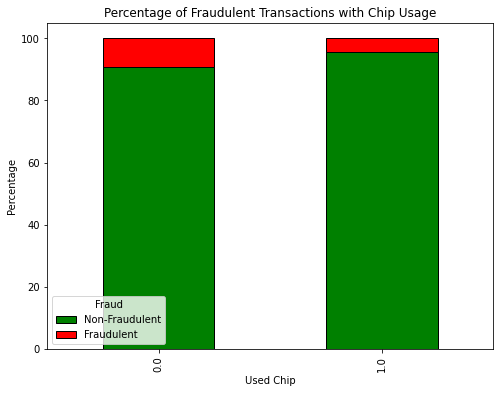

In [11]:
plt.figure(figsize=(8, 6))
sns.countplot(
    data=data, 
    x='used_chip', 
    hue='fraud', 
    palette={0: 'green', 1: 'red'}
)
plt.title("Transactions with Chip vs Fraudulent Transactions")
plt.xlabel("Used Chip")
plt.ylabel("Count")
plt.legend(title="Fraud", labels=["Non-Fraudulent", "Fraudulent"])
plt.show()

# Calculate the counts for each combination of 'used_chip' and 'fraud'
stacked_data_used_chip = data.groupby(['used_chip', 'fraud']).size().unstack(fill_value=0)

# Normalize the counts to get percentages
stacked_data_used_chip_percentage = stacked_data_used_chip.div(stacked_data_used_chip.sum(axis=1), axis=0) * 100

# Plot the percentage stacked bar chart
stacked_data_used_chip_percentage.plot(
    kind='bar', 
    stacked=True, 
    figsize=(8, 6), 
    color=['green', 'red'], 
    edgecolor='black'
)

# Add titles and labels
plt.title("Percentage of Fraudulent Transactions with Chip Usage")
plt.xlabel("Used Chip")
plt.ylabel("Percentage")
plt.legend(title="Fraud", labels=["Non-Fraudulent", "Fraudulent"])
plt.show()



**Prompt**: Create the same two plots for online orders

**AI**: ChatGPT-4

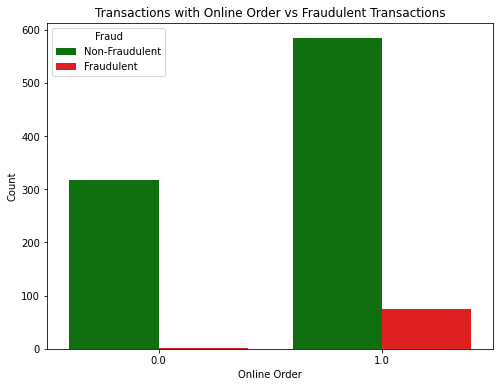

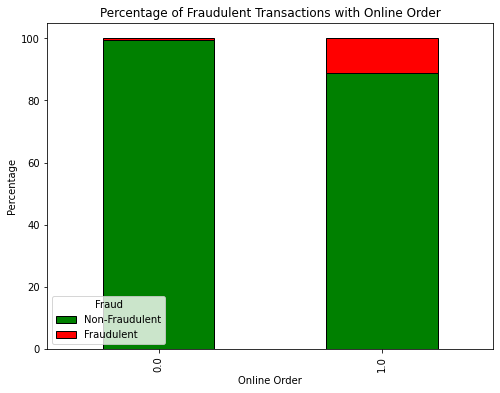

In [12]:
plt.figure(figsize=(8, 6))
sns.countplot(
    data=data, 
    x='online_order', 
    hue='fraud', 
    palette={0: 'green', 1: 'red'}
)
plt.title("Transactions with Online Order vs Fraudulent Transactions")
plt.xlabel("Online Order")
plt.ylabel("Count")
plt.legend(title="Fraud", labels=["Non-Fraudulent", "Fraudulent"])
plt.show()

# Calculate the counts for each combination of 'online_order' and 'fraud'
stacked_data_online_order = data.groupby(['online_order', 'fraud']).size().unstack(fill_value=0)

# Normalize the counts to get percentages
stacked_data_online_order_percentage = stacked_data_online_order.div(stacked_data_online_order.sum(axis=1), axis=0) * 100

# Plot the percentage stacked bar chart
stacked_data_online_order_percentage.plot(
    kind='bar', 
    stacked=True, 
    figsize=(8, 6), 
    color=['green', 'red'], 
    edgecolor='black'
)

# Add titles and labels
plt.title("Percentage of Fraudulent Transactions with Online Order")
plt.xlabel("Online Order")
plt.ylabel("Percentage")
plt.legend(title="Fraud", labels=["Non-Fraudulent", "Fraudulent"])
plt.show()


**Prompt**: Create a subtitle for Bivariate Visualizations. Create a scatterplot with Distance from Home on the x axis and ratio to median purhcase price on the y axis. color green for 0 and red for 1

**AI**: ChatGPT-4

## Bivariate Visualizations



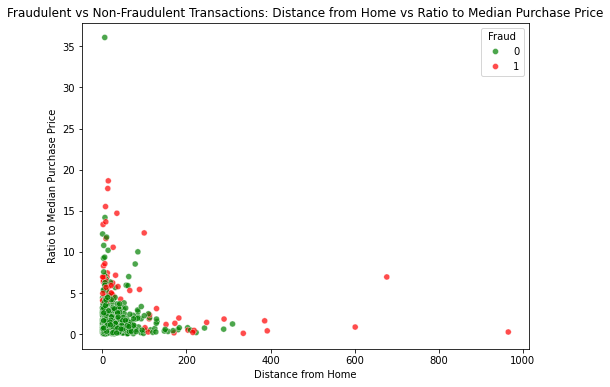

In [13]:
plt.figure(figsize=(8, 6))
scatter = sns.scatterplot(
    data=data, 
    x='distance_from_home', 
    y='ratio_to_median_purchase_price', 
    hue='fraud', 
    palette={0: 'green', 1: 'red'},
    alpha=0.7
)

# Create a custom legend based on the hue values
plt.title("Fraudulent vs Non-Fraudulent Transactions: Distance from Home vs Ratio to Median Purchase Price")
plt.xlabel("Distance from Home")
plt.ylabel("Ratio to Median Purchase Price")

# Set the legend correctly
handles, labels = scatter.get_legend_handles_labels()
plt.legend(handles=handles, labels=["0", "1"], title="Fraud", loc="best")

plt.show()


**Prompt**: Now place the distance from last transaction on the y axis 

**AI**: ChatGPT-4

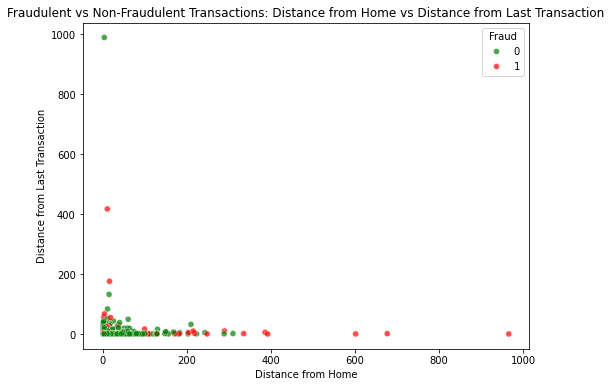

In [14]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=data, 
    x='distance_from_home', 
    y='distance_from_last_transaction', 
    hue='fraud', 
    palette={0: 'green', 1: 'red'},
    alpha=0.7
)

# Customize the legend to display correct labels
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=[handles[0], handles[1]], labels=["0", "1"], title="Fraud")

# Add titles and labels
plt.title("Fraudulent vs Non-Fraudulent Transactions: Distance from Home vs Distance from Last Transaction")
plt.xlabel("Distance from Home")
plt.ylabel("Distance from Last Transaction")
plt.show()


**Prompt**: Now put Distance from Last Transaction on the x axis and Ratio to Median Purchase Price on the y axis

**AI**: ChatGPT-4

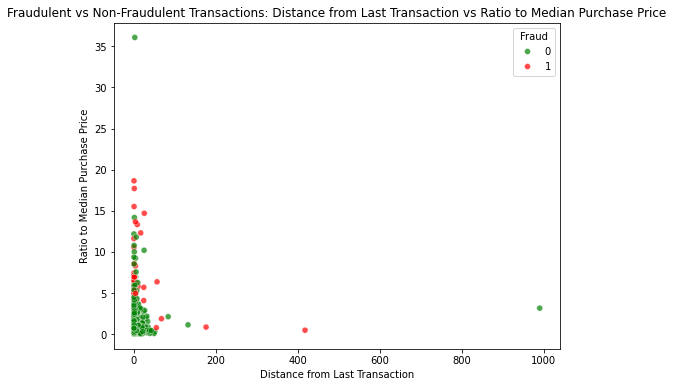

In [15]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=data, 
    x='distance_from_last_transaction', 
    y='ratio_to_median_purchase_price', 
    hue='fraud', 
    palette={0: 'green', 1: 'red'},
    alpha=0.7
)

# Customize the legend to display correct labels
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=[handles[0], handles[1]], labels=["0", "1"], title="Fraud")

# Add titles and labels
plt.title("Fraudulent vs Non-Fraudulent Transactions: Distance from Last Transaction vs Ratio to Median Purchase Price")
plt.xlabel("Distance from Last Transaction")
plt.ylabel("Ratio to Median Purchase Price")
plt.show()


**Prompt**: Create a subtitle for Can we predict if a transaction is fraud? Split the data into 20% testing and 80% training. Print out each of the four variables after the split. 

**AI**: ChatGPT-4

## Can We Predict if a Transaction is Fraud?



In [16]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target variable (y)
X = data.drop('fraud', axis=1)  # Features (all columns except 'fraud')
y = data['fraud']  # Target variable (fraud or not fraud)

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print out the variables after the split
print(X_train, y_train, X_test, y_test)

     distance_from_home  distance_from_last_transaction  \
954           39.904167                        0.367448   
143            2.660649                        0.657162   
643           48.902727                        0.205816   
15           179.665148                        0.120920   
793          676.702348                        1.209733   
..                  ...                             ...   
685            5.916343                        5.099247   
722           23.517527                        3.513485   
173            3.273426                        1.056948   
499            7.387696                        1.598827   
593            5.630854                        1.626769   

     ratio_to_median_purchase_price  repeat_retailer  used_chip  \
954                        0.260833              1.0        1.0   
143                        3.837860              1.0        0.0   
643                        1.307000              1.0        0.0   
15                     

**Prompt**: How do I find how mnay transactions are in the test set?  

**AI**: ChatGPT-4

In [17]:
# Calculate the number of transactions in the test set
num_test_transactions = X_test.shape[0]
num_test_transactions

196

**Prompt**: Create a subtitle for Never Fraud Model. If the model says the transaction is never fraud, create the model and print the first 100 predictions. 

**AI**: ChatGPT-4

## Never Fraud Model



In [18]:
from sklearn.dummy import DummyClassifier

# Create a "Never Fraud" model (predicts the most frequent class, which is non-fraud)
never_fraud_model = DummyClassifier(strategy="most_frequent", random_state=42)

# Train the model on the training data
never_fraud_model.fit(X_train, y_train)

# Get the predictions
predictions = never_fraud_model.predict(X_test)

# Print the first 100 predictions
print(predictions[:100])


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


**Prompt**: Create a basic KNN model with k=3 and print the first 100 predictions 

**AI**: ChatGPT-4

## Basic KNN Model


In [19]:
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN model with k=3
knn_model = KNeighborsClassifier(n_neighbors=3)

# Train the model on the training data
knn_model.fit(X_train, y_train)

# Get the predictions
knn_predictions = knn_model.predict(X_test)

# Print the first 100 predictions
print(knn_predictions[:100])


[0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]


**Prompt**: Evaluate the modles by creating a confusion matrix for the two models. Make the never fraud model reds and the knn model blues. Also print the classification reports.

**AI**: ChatGPT-4

## Model Evaluation


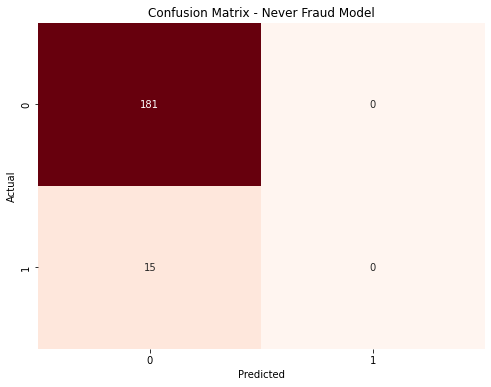

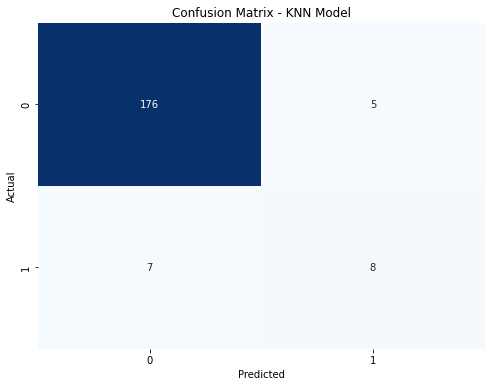

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix for Never Fraud Model
never_fraud_cm = confusion_matrix(y_test, predictions)

# Plot the confusion matrix for Never Fraud Model (in red)
plt.figure(figsize=(8, 6))
sns.heatmap(never_fraud_cm, annot=True, fmt='d', cmap='Reds', cbar=False, xticklabels=["0", "1"], yticklabels=["0", "1"])
plt.title("Confusion Matrix - Never Fraud Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Confusion Matrix for KNN Model
knn_cm = confusion_matrix(y_test, knn_predictions)

# Plot the confusion matrix for KNN Model (in blue)
plt.figure(figsize=(8, 6))
sns.heatmap(knn_cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=["0", "1"], yticklabels=["0", "1"])
plt.title("Confusion Matrix - KNN Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**Prompt**: Compare the model performances. Calculate metrics for each model including accuracy, precision, recall, and f1. Create a new dataframe for the comparision data with columns for Metrics, kNN scores, and never fraud scores. Plot them all in a bar chart together and color kNN blue and never fraud red. 

**AI**: ChatGPT-4

## Model Performance Comparison



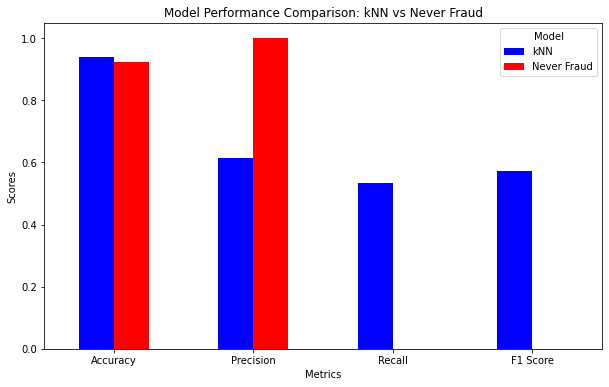

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the metrics for the Never Fraud model with zero_division handling
never_fraud_accuracy = accuracy_score(y_test, predictions)
never_fraud_precision = precision_score(y_test, predictions, zero_division=1)
never_fraud_recall = recall_score(y_test, predictions, zero_division=1)
never_fraud_f1 = f1_score(y_test, predictions, zero_division=1)

# Calculate the metrics for the KNN model
knn_accuracy = accuracy_score(y_test, knn_predictions)
knn_precision = precision_score(y_test, knn_predictions, zero_division=1)
knn_recall = recall_score(y_test, knn_predictions, zero_division=1)
knn_f1 = f1_score(y_test, knn_predictions, zero_division=1)

# Create a DataFrame for the comparison
comparison_df = pd.DataFrame({
    "Metrics": ["Accuracy", "Precision", "Recall", "F1 Score"],
    "kNN scores": [knn_accuracy, knn_precision, knn_recall, knn_f1],
    "Never Fraud scores": [never_fraud_accuracy, never_fraud_precision, never_fraud_recall, never_fraud_f1]
})

# Plot the bar chart
comparison_df.set_index("Metrics").plot(kind="bar", figsize=(10, 6), color=["blue", "red"])
plt.title("Model Performance Comparison: kNN vs Never Fraud")
plt.xlabel("Metrics")
plt.ylabel("Scores")
plt.xticks(rotation=0)
plt.legend(title="Model", labels=["kNN", "Never Fraud"])
plt.show()

